In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data2/train.csv', skipinitialspace=True)

## Feature preprocessing (light)

In [3]:
df['duration_min'] = df['duration_ms'] / 60000    
colonne = df.columns.tolist()
colonne = ['duration_min'] + [col for col in colonne if col != 'duration_min'] 
df = df[colonne]

df = df.drop(['tempo','mode','album_name','artists','name','key','popularity_confidence','explicit', 'time_signature', 'features_duration_ms', 'n_bars', 'n_beats','duration_ms','processing'], axis=1)
#df['mode'] = df['mode'].fillna(1) 

Abbiamo deciso di togliere explicit perchè altrimenti si sarebbe verificato il problema di sbilanciamento.
 Stesso discorso con mode, abbiamo provato a sostituire i NaN con 1 ma abbiamo avuto lo stesso problema di explicit.

In [4]:
df.head(1)

,duration_min,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,genre
0,4.029333,46,0.69,0.513,-12.529,0.0975,0.302,0.536,0.281,0.635,j-dance


In [5]:
df['popularity_category'] = df['popularity'].apply(lambda x: 'non popular' if 0 <= x <= 30 else 'popular')

In [6]:
df.head(5)

,duration_min,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,genre,popularity_category
0,4.029333,46,0.690,0.513,-12.529,0.0975,0.302000,0.53600,0.281,0.6350,j-dance,popular
1,7.400000,0,0.069,0.196,-24.801,0.0805,0.283000,0.93400,0.360,0.0336,iranian,non popular
2,5.558433,3,0.363,0.854,-7.445,0.0397,0.000089,0.80000,0.262,0.4890,black-metal,non popular
3,4.496667,23,0.523,0.585,-5.607,0.0765,0.066400,0.00127,0.117,0.3850,bluegrass,non popular
4,5.127517,25,0.643,0.687,-11.340,0.0539,0.000576,0.09690,0.299,0.6370,happy,non popular


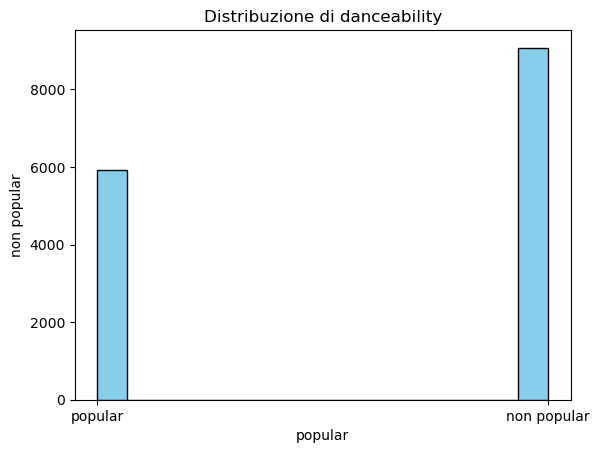

In [7]:
import matplotlib.pyplot as plt

# Creazione dell'istogramma
plt.hist(df["popularity_category"], bins=15, color='skyblue', edgecolor='black')

# Aggiunta di etichette e titolo
plt.xlabel('popular')
plt.ylabel('non popular')
plt.title('Distribuzione di danceability')

# Mostrare l'istogramma
plt.show()

## Pattern mining preprocessing

In [8]:
df["danceabilityBin"] = pd.qcut(df["danceability"], 3)
df["energyBin"] = pd.qcut(df["energy"], 3)
df["duration_minBin"] = pd.qcut(df["duration_min"], 3)
#df["popularityBin"] = pd.qcut(df["popularity"], 3)
df["danceabilityBin"] = pd.qcut(df["danceability"], 3)
df["loudnessBin"] = pd.qcut(df["loudness"], 3)
df["speechinessBin"] = pd.qcut(df["speechiness"], 3)
df["instrumentalnessBin"] = pd.qcut(df["instrumentalness"], 3)
df["livenessBin"] = pd.qcut(df["liveness"], 3)
df["valenceBin"] = pd.qcut(df["valence"], 3)

df.drop(["danceability", "energy",'duration_min','popularity','loudness','speechiness','acousticness','instrumentalness','liveness','valence'], axis=1, inplace=True)

In [9]:
df.head(1)

,genre,popularity_category,danceabilityBin,energyBin,duration_minBin,loudnessBin,speechinessBin,instrumentalnessBin,livenessBin,valenceBin
0,j-dance,popular,"(0.657, 0.98]","(-0.001, 0.562]","(3.271, 4.421]","(-49.532, -9.214]","(0.0698, 0.939]","(0.377, 1.0]","(0.209, 0.994]","(0.578, 0.995]"


In [10]:
df["danceabilityBin"] = df["danceabilityBin"].astype(str) + "_danceability"
df["energyBin"] = df["energyBin"].astype(str) + "_energy"
df["duration_minBin"] = df["duration_minBin"].astype(str) + "_duration_min"
#df["popularityBin"] = df["popularityBin"].astype(str) + "_popularity"
df["loudnessBin"] = df["loudnessBin"].astype(str) + "_loudness"
df["speechinessBin"] = df["speechinessBin"].astype(str) + "_speechiness"
df["instrumentalnessBin"] = df["instrumentalnessBin"].astype(str) + "_instrumentalness"
df["livenessBin"] = df["livenessBin"].astype(str) + "_liveness"
df["valenceBin"] = df["valenceBin"].astype(str) + "_valence"

In [11]:
df.head(1)

,genre,popularity_category,danceabilityBin,energyBin,duration_minBin,loudnessBin,speechinessBin,instrumentalnessBin,livenessBin,valenceBin
0,j-dance,popular,"(0.657, 0.98]_danceability","(-0.001, 0.562]_energy","(3.271, 4.421]_duration_min","(-49.532, -9.214]_loudness","(0.0698, 0.939]_speechiness","(0.377, 1.0]_instrumentalness","(0.209, 0.994]_liveness","(0.578, 0.995]_valence"


In [12]:
X = df.values.tolist()

In [13]:
X[0]

['j-dance',
 'popular',
 '(0.657, 0.98]_danceability',
 '(-0.001, 0.562]_energy',
 '(3.271, 4.421]_duration_min',
 '(-49.532, -9.214]_loudness',
 '(0.0698, 0.939]_speechiness',
 '(0.377, 1.0]_instrumentalness',
 '(0.209, 0.994]_liveness',
 '(0.578, 0.995]_valence']

# Pattern Mining

## Apriori

In [14]:
# !pip install pyfim
from fim import apriori

### Frequent Itemset

In [15]:
numero_transazioni = len(df)
print("Il numero totale di transazioni nel dataset è:", numero_transazioni)

Il numero totale di transazioni nel dataset è: 15000


In [16]:
supp = 17  
zmin = 2  # minimum number of items per item set

itemsets = apriori(X, target="s", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])

,frequent_itemset,support
0,"((0.107, 0.209]_liveness, non popular)",19.533333
1,"((0.0412, 0.0698]_speechiness, non popular)",20.126667
2,"((0.834, 1.0]_energy, (-5.791, 3.156]_loudness)",21.993333
3,"((0.834, 1.0]_energy, non popular)",23.186667
4,"((0.657, 0.98]_danceability, (0.578, 0.995]_va...",17.800000
5,"((0.657, 0.98]_danceability, non popular)",19.880000
6,"((0.269, 0.578]_valence, non popular)",19.826667
7,"((1.27e-05, 0.377]_instrumentalness, non popular)",21.200000
8,"((0.209, 0.994]_liveness, non popular)",20.220000
9,"((0.0698, 0.939]_speechiness, non popular)",22.993333


### Closed Itemsets

In [17]:
supp = 17
zmin = 2  # minimum number of items per item set

itemsets = apriori(X, target="c", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["closed_itemset", "support"])

,closed_itemset,support
0,"((0.107, 0.209]_liveness, non popular)",19.533333
1,"((0.0412, 0.0698]_speechiness, non popular)",20.126667
2,"((0.834, 1.0]_energy, (-5.791, 3.156]_loudness)",21.993333
3,"((0.834, 1.0]_energy, non popular)",23.186667
4,"((0.657, 0.98]_danceability, (0.578, 0.995]_va...",17.800000
5,"((0.657, 0.98]_danceability, non popular)",19.880000
6,"((0.269, 0.578]_valence, non popular)",19.826667
7,"((1.27e-05, 0.377]_instrumentalness, non popular)",21.200000
8,"((0.209, 0.994]_liveness, non popular)",20.220000
9,"((0.0698, 0.939]_speechiness, non popular)",22.993333


### Maximal Itemsets

In [18]:
itemsets = apriori(X, target="m", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["maximal_itemset", "support"])

,maximal_itemset,support
0,"((0.107, 0.209]_liveness, non popular)",19.533333
1,"((0.0412, 0.0698]_speechiness, non popular)",20.126667
2,"((0.834, 1.0]_energy, (-5.791, 3.156]_loudness)",21.993333
3,"((0.834, 1.0]_energy, non popular)",23.186667
4,"((0.657, 0.98]_danceability, (0.578, 0.995]_va...",17.800000
5,"((0.657, 0.98]_danceability, non popular)",19.880000
6,"((0.269, 0.578]_valence, non popular)",19.826667
7,"((1.27e-05, 0.377]_instrumentalness, non popular)",21.200000
8,"((0.209, 0.994]_liveness, non popular)",20.220000
9,"((0.0698, 0.939]_speechiness, non popular)",22.993333


In [19]:
from fim import fpgrowth

In [20]:
itemsets = fpgrowth(X, target="m", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["maximal_itemset", "support"])


,maximal_itemset,support
0,"((0.107, 0.209]_liveness, non popular)",19.533333
1,"((0.0412, 0.0698]_speechiness, non popular)",20.126667
2,"((0.834, 1.0]_energy, (-5.791, 3.156]_loudness)",21.993333
3,"((0.834, 1.0]_energy, non popular)",23.186667
4,"((0.657, 0.98]_danceability, (0.578, 0.995]_va...",17.800000
5,"((0.657, 0.98]_danceability, non popular)",19.880000
6,"((0.269, 0.578]_valence, non popular)",19.826667
7,"((1.27e-05, 0.377]_instrumentalness, non popular)",21.200000
8,"((0.209, 0.994]_liveness, non popular)",20.220000
9,"((0.0698, 0.939]_speechiness, non popular)",22.993333


### Support plots

#### Support vs number of itemsets

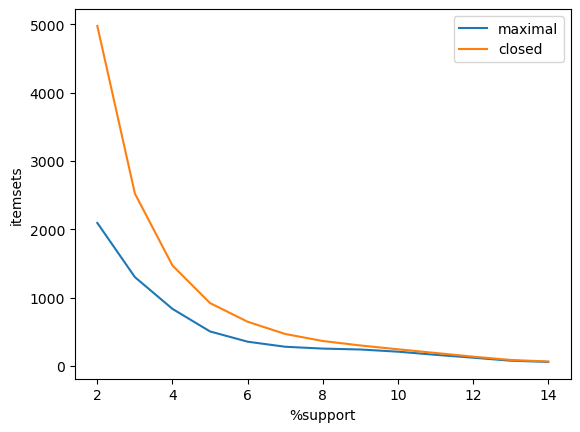

In [21]:
len_max_it = []
len_cl_it = []
max_supp = 15
for i in range(2, max_supp):
    max_itemsets = apriori(X, target="m", supp=i, zmin=zmin)
    cl_itemsets = apriori(X, target="c", supp=i, zmin=zmin)
    len_max_it.append(len(max_itemsets))
    len_cl_it.append(len(cl_itemsets))

plt.plot(np.arange(2, max_supp), len_max_it, label="maximal")
plt.plot(np.arange(2, max_supp), len_cl_it, label="closed")
plt.legend()
plt.xlabel("%support")
plt.ylabel("itemsets")

plt.show()

In [22]:
df.head(1)

,genre,popularity_category,danceabilityBin,energyBin,duration_minBin,loudnessBin,speechinessBin,instrumentalnessBin,livenessBin,valenceBin
0,j-dance,popular,"(0.657, 0.98]_danceability","(-0.001, 0.562]_energy","(3.271, 4.421]_duration_min","(-49.532, -9.214]_loudness","(0.0698, 0.939]_speechiness","(0.377, 1.0]_instrumentalness","(0.209, 0.994]_liveness","(0.578, 0.995]_valence"


#### Support vs number of itemset for popularity / danceability

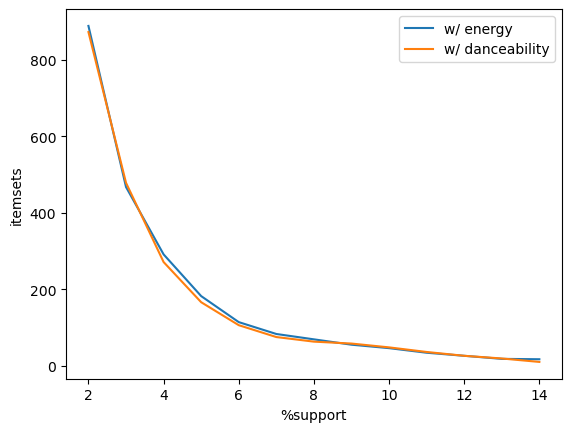

In [23]:
filter_1 = []
filter_2 = []

# Lista di sottostringhe da cercare negli itemsets massimali
search_terms_1 = "energy"
search_terms_2 = "danceability"

for i in range(2, max_supp):
    max_itemsets = apriori(X, target="m", supp=i, zmin=zmin, report="S")
    
    # Conta quanti itemsets massimali contengono la sottostringa "popularity"
    count_1 = sum(1 for itemset, support in max_itemsets if search_terms_1 in str(itemset))
    filter_1.append(count_1)

    # Conta quanti itemsets massimali contengono la sottostringa "energy"
    count_2 = sum(1 for itemset, support in max_itemsets if search_terms_2 in str(itemset))
    filter_2.append(count_2)

# Grafico
plt.plot(np.arange(2, max_supp), filter_1, label="w/ energy")
plt.plot(np.arange(2, max_supp), filter_2, label="w/ danceability")

plt.legend()
plt.xticks()
plt.xlabel("%support")
plt.ylabel("itemsets")

plt.show()



### Rules

In [24]:
conf = 60
rules = apriori(X, target="r", supp=supp, zmin=zmin, conf=conf, report="aScl")
rules_df = pd.DataFrame(
    rules,
    columns=[
        "consequent",
        "antecedent",
        "abs_support",
        "%_support",
        "confidence",
        "lift",
    ],
)
rules_df.sort_values(by="lift", axis=0, ascending=False)

,consequent,antecedent,abs_support,%_support,confidence,lift
22,"(-49.532, -9.214]_loudness","((-0.001, 0.562]_energy, non popular)",2132,14.213333,0.774428,2.323284
3,"(0.834, 1.0]_energy","((-5.791, 3.156]_loudness, non popular)",2270,15.133333,0.736774,2.220536
24,"(-49.532, -9.214]_loudness","((-0.001, 0.562]_energy,)",3624,24.160000,0.723498,2.170493
23,"(-0.001, 0.562]_energy","((-49.532, -9.214]_loudness,)",3624,24.160000,0.724800,2.170493
21,"(-0.001, 0.562]_energy","((-49.532, -9.214]_loudness, non popular)",2132,14.213333,0.689521,2.064847
15,"(-0.001, 0.562]_energy","((0.377, 1.0]_instrumentalness, (-49.532, -9.2...",1925,12.833333,0.688730,2.062477
4,"(-5.791, 3.156]_loudness","((0.834, 1.0]_energy,)",3299,21.993333,0.662849,1.988547
5,"(0.834, 1.0]_energy","((-5.791, 3.156]_loudness,)",3299,21.993333,0.659800,1.988547
2,"(-5.791, 3.156]_loudness","((0.834, 1.0]_energy, non popular)",2270,15.133333,0.652674,1.958022
14,"(-49.532, -9.214]_loudness","((0.377, 1.0]_instrumentalness, (-0.001, 0.269...",1772,11.813333,0.650037,1.950110


### Classification

In [25]:
df.head(1)

,genre,popularity_category,danceabilityBin,energyBin,duration_minBin,loudnessBin,speechinessBin,instrumentalnessBin,livenessBin,valenceBin
0,j-dance,popular,"(0.657, 0.98]_danceability","(-0.001, 0.562]_energy","(3.271, 4.421]_duration_min","(-49.532, -9.214]_loudness","(0.0698, 0.939]_speechiness","(0.377, 1.0]_instrumentalness","(0.209, 0.994]_liveness","(0.578, 0.995]_valence"


In [26]:
rules_df[rules_df["consequent"] == 'non popular']

,consequent,antecedent,abs_support,%_support,confidence,lift
0,non popular,"((0.0412, 0.0698]_speechiness,)",3019,20.126667,0.608179,1.005587
1,non popular,"((0.834, 1.0]_energy, (-5.791, 3.156]_loudness)",2270,15.133333,0.688087,1.137710
6,non popular,"((0.834, 1.0]_energy,)",3478,23.186667,0.698815,1.155447
7,non popular,"((1.27e-05, 0.377]_instrumentalness,)",3180,21.200000,0.636637,1.052640
8,non popular,"((0.209, 0.994]_liveness,)",3033,20.220000,0.607207,1.003980
9,non popular,"((0.0698, 0.939]_speechiness,)",3449,22.993333,0.690214,1.141227
10,non popular,"((0.578, 0.995]_valence,)",3008,20.053333,0.601841,0.995107
11,non popular,"((4.421, 68.671]_duration_min,)",3270,21.800000,0.654000,1.081349
12,non popular,"((-5.791, 3.156]_loudness,)",3081,20.540000,0.616200,1.018849
16,non popular,"((0.377, 1.0]_instrumentalness, (-49.532, -9.2...",1933,12.886667,0.691592,1.143506


In [27]:
len_r = []
min_sup = 1
max_sup = 20
min_conf = 50
max_conf = 90
for i in range(min_sup, max_sup):  # support
    len_r_wrt_i = []
    for j in range(min_conf, max_conf):  # confidence
        rules = apriori(X, target="r", supp=i, zmin=zmin, conf=j, report="aScl")
        len_r_wrt_i.append(len(rules))  # study your characteristics/properties here

    len_r.append(len_r_wrt_i)
len_r = np.array(len_r)

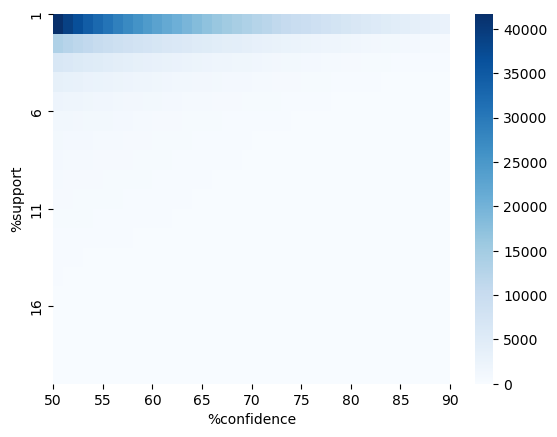

In [28]:
sns.heatmap(len_r, cmap="Blues", fmt='g')
plt.yticks(np.arange(0, max_sup-min_sup +1, 5), np.arange(min_sup, max_sup+1,5 ))
plt.xticks(np.arange(0, max_conf-min_conf+1, 5), np.arange(min_conf, max_conf+1, 5))
plt.xlabel("%confidence")
plt.ylabel("%support")
plt.show()

In [29]:
!pip install mlxtend

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.frequent_patterns import association_rules


In [33]:
# Supponiamo che 'predictions' sia la lista delle tue previsioni
num_predictions = len(predictions)
print("Numero di previsioni:", num_predictions)


Numero di previsioni: 17


In [35]:
print(predictions)


['non popular', 'non popular', 'non popular', 'non popular', 'non popular', 'non popular', 'non popular', 'non popular', 'non popular', 'non popular', 'non popular', 'non popular', 'non popular', 'non popular', 'non popular', 'non popular', 'non popular']


In [36]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

# Assumiamo che 'rules_df' sia il DataFrame contenente le regole di associazione
# Consideriamo 'consequent' come la colonna delle predizioni

# Filtra le regole per la condizione specificata
interesting_rule = rules_df[rules_df["consequent"] == 'non popular']

# Costruisci una lista di previsioni basate sulla regola interessante
# Ad esempio, assumiamo che 'consequent' sia la colonna delle predizioni
predictions = list(interesting_rule['consequent'])

# Assumiamo che 'y_true' siano i veri valori della variabile target
# y_true è una lista dei valori effettivi della variabile target
y_true = ['non popular', 'non popular', 'non popular', 'non popular', 'non popular', 'non popular', 'non popular', 'non popular', 'non popular', 'non popular', 'non popular', 'non popular', 'non popular', 'non popular', 'non popular', 'non popular', 'non popular']  # Inserisci i veri valori della variabile target

# Valuta le previsioni utilizzando la matrice di confusione e il report di classificazione
# Assume che 'predictions' sia una lista di previsioni e 'y_true' sia la lista dei valori effettivi della variabile target
conf_matrix = confusion_matrix(y_true, predictions)
report = classification_report(y_true, predictions)

# Stampa la matrice di confusione e il report di classificazione
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)


Confusion Matrix:
[[17]]

Classification Report:
              precision    recall  f1-score   support

 non popular       1.00      1.00      1.00        17

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17



## FP-Growth

In [ ]:
from fim import fpgrowth

In [ ]:
supp = 17  # 20%
zmin = 2  # minimum number of items per item set

itemsets = fpgrowth(X, target="s", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])

In [ ]:
conf = 70
rules = fpgrowth(X, target="r", supp=supp, zmin=zmin, conf=conf, report="aScl")
pd.DataFrame(
    rules,
    columns=[
        "consequent",
        "antecedent",
        "abs_support",
        "%_support",
        "confidence",
        "lift",
    ],
)

In [ ]:
supp = 17 # 15%
zmin = 2  # minimum number of items per item set

itemsets = apriori(X, target="c", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["closed_itemset", "support"])

In [ ]:
conf = 70
rules = fpgrowth(X, target="r", supp=supp, zmin=zmin, conf=conf, report="aScl")
pd.DataFrame(
    rules,
    columns=[
        "consequent",
        "antecedent",
        "abs_support",
        "%_support",
        "confidence",
        "lift",
    ],
)